In [25]:
import os
import shutil

def move_images(source_folder, img_name):
    # Define the target folder for "iLeft" images
    target_folder = os.path.join(source_folder, img_name)
    
    # Create the target folder if it doesn't exist
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    
    # Loop through all files in the source folder
    for filename in os.listdir(source_folder):
        # Check if the file name starts with "iLeft"
        if filename.startswith(img_name) and filename.endswith(('.png', '.jpg', '.jpeg')):
            # Construct full file paths
            source_path = os.path.join(source_folder, filename)
            target_path = os.path.join(target_folder, filename)
            
            # Move the file to the target folder
            shutil.move(source_path, target_path)
            #print(f"Moved: {filename} to {target_folder}")
    print(f"Moved")


In [ ]:
# Usage example
move_images("./DataV3D/", "iLeft")
move_images("./DataV3D/", "iRight") 
move_images("./DataV3D/", "iDispLeft") 

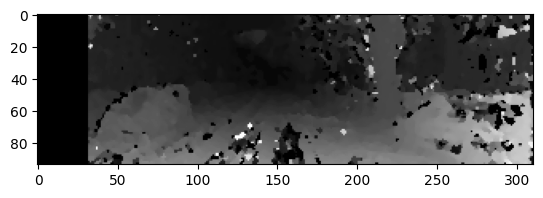

In [40]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
imgL = cv.imread('./DataV3D/iLeft/iLeft0001.png', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('./DataV3D/iRight/iRight0001.png', cv.IMREAD_GRAYSCALE)
stereo = cv.StereoSGBM.create(numDisparities=32, blockSize=3)

disparity = stereo.compute(imgL,imgR)

cv.imwrite('./DataV3D/iDispLeft.png', disparity)

plt.imshow(disparity,'gray')
plt.show()

In [45]:
# Chemins des répertoires contenant les images
left_dir = './DataV3D/iLeft'
right_dir = './DataV3D/iRight'
output_dir = './DataV3D/DisparitySGBM'

# Créer le répertoire de sortie s'il n'existe pas
os.makedirs(output_dir, exist_ok=True)

# Créer un calculateur de disparité
stereo = cv.StereoSGBM.create(numDisparities=32, blockSize=3)

# Parcourir toutes les images
for i in range(1, 201): 
    
    left_image_path = os.path.join(left_dir, f'iLeft{i:04d}.png')
    right_image_path = os.path.join(right_dir, f'iRight{i:04d}.png')
    
    imgL = cv.imread(left_image_path, cv.IMREAD_GRAYSCALE)
    imgR = cv.imread(right_image_path, cv.IMREAD_GRAYSCALE)

    disparity = stereo.compute(imgL, imgR)

    output_path = os.path.join(output_dir, f'iDispLeft{i:04d}.png')
    cv.imwrite(output_path, disparity)

# Fin du traitement
print(f"Carte de disparité sauvegardée : {output_dir}")


Carte de disparité sauvegardée : ./DataV3D/DisparitySGBM
